In [39]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np

In [2]:
def plot_oloc(df,channels):

    fig, axs = plt.subplots(len(channels),1)
    fig.set_size_inches(12,2*len(channels))

    if len(channels) == 1:
        axs = [axs]

    axs = axs.flatten()

    for i_chan, chan in enumerate(channels):
        axs[i_chan].plot(df.Time,df[chan])
        axs[i_chan].set_ylabel(chan)
        axs[i_chan].grid()

    axs[-1].set_xlabel('Time')
    
    return fig, axs
    

(<Figure size 864x720 with 5 Axes>,
 array([<AxesSubplot:ylabel='Wind1VelX'>, <AxesSubplot:ylabel='GenTq'>,
        <AxesSubplot:ylabel='BldPitch1'>, <AxesSubplot:ylabel='RotSpeed'>,
        <AxesSubplot:xlabel='Time', ylabel='PtfmPitch'>], dtype=object))

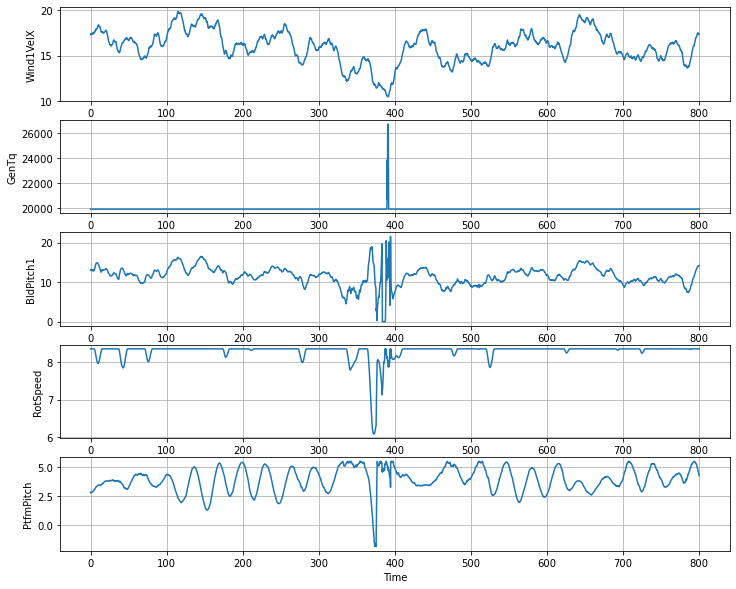

In [19]:
df = pd.read_pickle('/Users/dzalkind/Tools/WEIS-1/examples/13_DTQP/outputs/IEA_level2_dtqp_6/oloc_0.p')
# df = pd.read_pickle('/Users/dzalkind/Tools/WEIS-1/outputs/IEA_level2_dtqp_full/oloc_04.p')
channels = ['Wind1VelX','GenTq','BldPitch1','RotSpeed','PtfmPitch']

plot_oloc(df,channels)

In [42]:
# functionize what's above
def cl_error(cl_outs,ol_outs,t_start=100):
    # resample based on CL time indices
#     ol_resample = {}
#     rms_error = {}
#     for chan in ol_outs:
#     ol_resample[chan] = np.interp(cl_outs['Time'],ol_outs['Time'],ol_outs[chan])
    ol_resample = np.interp(cl_outs['Time'],ol_outs['Time'],ol_outs['BldPitch1'])
        
#     error = cl_outs[chan] - ol_resample[chan]
    error = cl_outs['BldPitch1'] - ol_resample
#         rms_error[chan] = np.sqrt(np.mean(error[tt > t_start]**2))

    rms_error = np.sqrt(np.mean(error[cl_outs['Time'] > t_start]**2))
    
    # let's return only pitch for now, can generalize later
    return rms_error, error
    

# cl_error(l2_out,l2_ol)

Text(0.5, 0, 'Time')

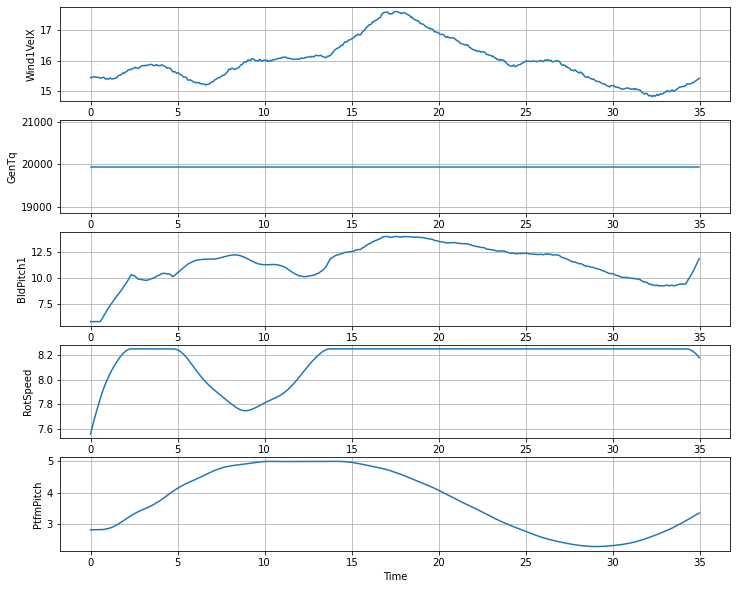

(<Figure size 864x720 with 5 Axes>,
 array([<AxesSubplot:ylabel='RtVAvgxh'>, <AxesSubplot:ylabel='GenTq'>,
        <AxesSubplot:ylabel='BldPitch1'>, <AxesSubplot:ylabel='RotSpeed'>,
        <AxesSubplot:xlabel='Time', ylabel='PtfmPitch'>], dtype=object))

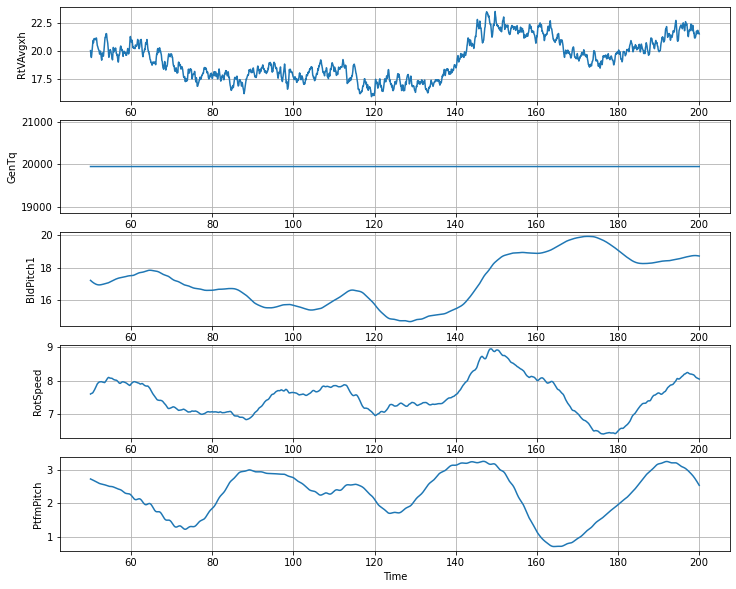

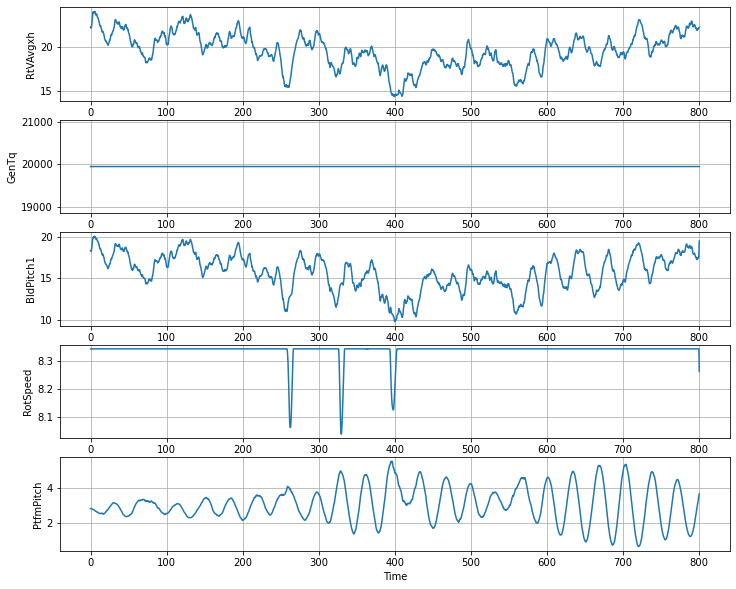

In [70]:
channels = ['RtVAvgxh','GenTq','BldPitch1','RotSpeed','PtfmPitch']


cl_ts = pd.read_pickle('/Users/dzalkind/Tools/WEIS-1/outputs/IEA_level2_ol2cl/iteration_0/timeseries/lin_0.p')
plot_oloc(cl_ts,channels)

ol_ts = pd.read_pickle('/Users/dzalkind/Tools/WEIS-1/examples/13_DTQP/outputs/IEA_level2_dtqp_6/oloc_0.p')
plot_oloc(ol_ts,channels)

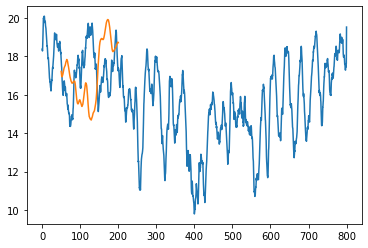

In [71]:
plt.plot(ol_ts.Time,ol_ts.BldPitch1)
plt.plot(cl_ts.Time,cl_ts.BldPitch1)

rms, err = cl_error(cl_ts,ol_ts)

2.608981984831488

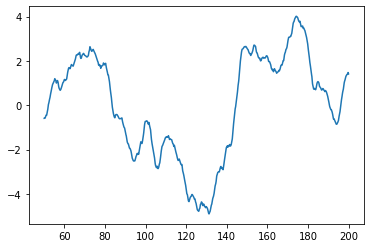

In [72]:
plt.plot(cl_ts.Time,err)
rms

In [79]:

ol_resample = np.interp(cl_ts['Time'],ol_ts['Time'],ol_ts['BldPitch1'])

error = cl_ts['BldPitch1'] - ol_resample

rms_error = np.sqrt(np.mean(error**2))

rms_error

2.335288379121436

ValueError: x and y must have same first dimension, but have shapes (15001,) and (70001,)

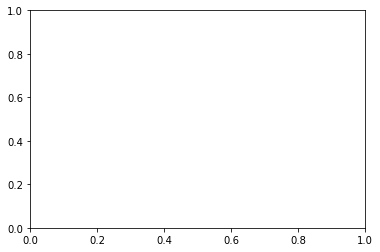

In [73]:
plt.plot(cl_ts.Time,ol_resample)
plt.plot(ol_ts.Time,ol_ts.BldPitch1)


t_start


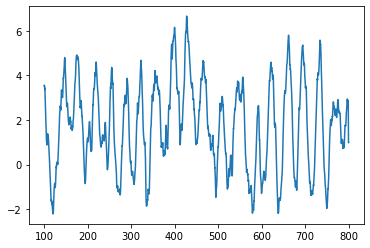

In [65]:
plt.plot(cl_ts.Time,error)